<a href="https://colab.research.google.com/github/suans200/energy_consumption_prediction_finalyear/blob/main/energy_consumption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: subhankarswain
Your Kaggle Key: ··········


100%|██████████| 1.36M/1.36M [00:00<00:00, 85.3MB/s]

In [ ]:
data_dir = './electric-power-consumption'

In [ ]:
import os
os.listdir(data_dir)

['powerconsumption.csv']

In [ ]:
train_df = pd.read_csv( data_dir+'/powerconsumption.csv')


In [ ]:
train_df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
train_df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
train_df_modified=train_df.drop(['PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1)

In [ ]:
train_df_modified.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [ ]:
train_df_modified=train_df_modified.rename(columns={ 'PowerConsumption_Zone1': 'TotalPowerConsumption'})

#Data Visulization


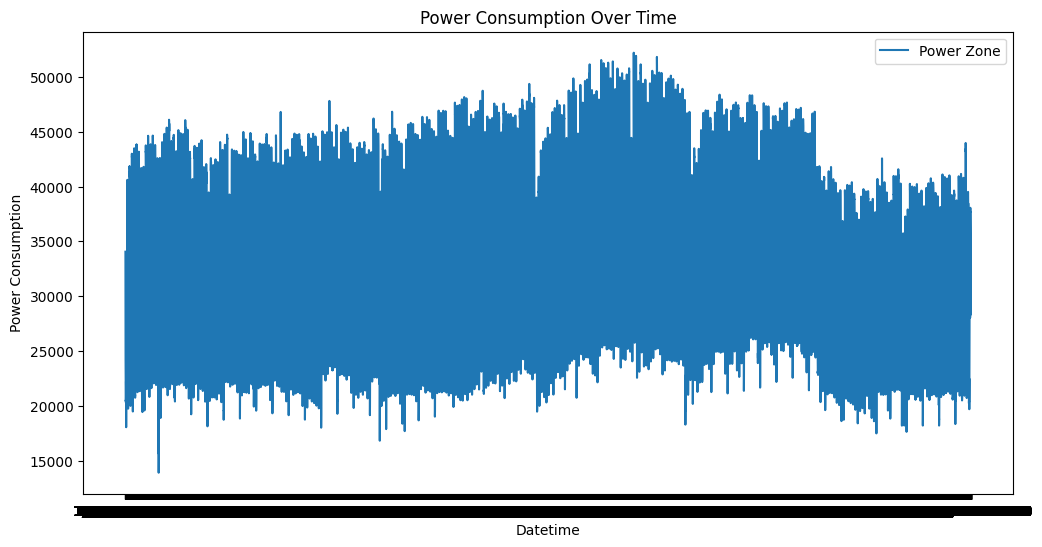

In [ ]:
# Time series plot for PowerConsumption
#used to visualize data points over a time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Datetime', y='TotalPowerConsumption', data=train_df_modified, label='Power Zone')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

In [ ]:
train_df_modified['Datetime']=pd.to_datetime(train_df_modified.Datetime)
train_df_modified.sort_values(by='Datetime', ascending=True, inplace=True)

chronological_order = train_df_modified['Datetime'].is_monotonic_increasing

In [ ]:
chronological_order

True

#Handle Missing Values

In [ ]:
train_df_modified.isna().sum()

Datetime                 0
Temperature              0
Humidity                 0
WindSpeed                0
GeneralDiffuseFlows      0
DiffuseFlows             0
TotalPowerConsumption    0
dtype: int64

#Feature Engineering

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['day'] = df.index.month
    df['year'] = df.index.year
    df['season'] = df['month'] % 12 // 3 + 1
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    # Additional features
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['is_month_start'] = (df['dayofmonth'] == 1).astype(int)
    df['is_month_end'] = (df['dayofmonth'] == df.index.days_in_month).astype(int)
    df['is_quarter_start'] = (df['dayofmonth'] == 1) & (df['month'] % 3 == 1).astype(int)
    df['is_quarter_end'] = (df['dayofmonth'] == df.groupby(['year', 'quarter'])['dayofmonth'].transform('max'))

    # Additional features
    df['is_working_day'] = df['dayofweek'].isin([0, 1, 2, 3, 4]).astype(int)
    df['is_business_hours'] = df['hour'].between(9, 17).astype(int)
    df['is_peak_hour'] = df['hour'].isin([8, 12, 18]).astype(int)

    # Minute-level features
    df['minute_of_day'] = df['hour'] * 60 + df['minute']
    df['minute_of_week'] = (df['dayofweek'] * 24 * 60) + df['minute_of_day']

    return df.astype(float)

In [ ]:
df = train_df_modified.set_index('Datetime')
df = create_features(df)

In [ ]:
df[[ 'year', 'month', 'day','minute', 'dayofyear', 'weekofyear', 'quarter', 'season']].head()


,year,month,day,minute,dayofyear,weekofyear,quarter,season
Datetime,,,,,,,,
2017-01-01 00:00:00,2017.0,1.0,1.0,0.0,1.0,52.0,1.0,1.0
2017-01-01 00:10:00,2017.0,1.0,1.0,10.0,1.0,52.0,1.0,1.0
2017-01-01 00:20:00,2017.0,1.0,1.0,20.0,1.0,52.0,1.0,1.0
2017-01-01 00:30:00,2017.0,1.0,1.0,30.0,1.0,52.0,1.0,1.0
2017-01-01 00:40:00,2017.0,1.0,1.0,40.0,1.0,52.0,1.0,1.0


#EXPLORATORY DATA ANALYSIS

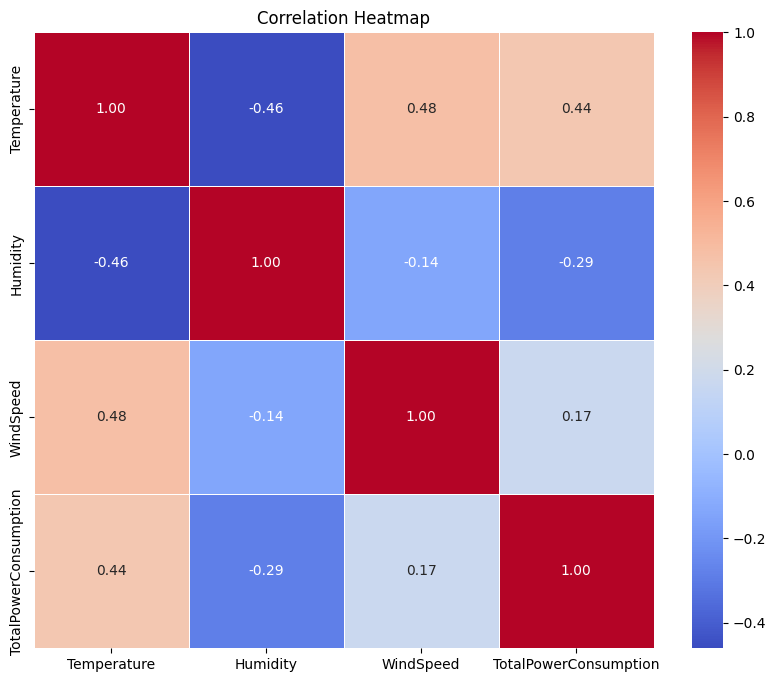

In [ ]:
correlation_matrix = df[['Temperature', 'Humidity', 'WindSpeed', 'TotalPowerConsumption']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52416 non-null  float64
 1   Humidity               52416 non-null  float64
 2   WindSpeed              52416 non-null  float64
 3   GeneralDiffuseFlows    52416 non-null  float64
 4   DiffuseFlows           52416 non-null  float64
 5   TotalPowerConsumption  52416 non-null  float64
 6   hour                   52416 non-null  float64
 7   minute                 52416 non-null  float64
 8   dayofweek              52416 non-null  float64
 9   quarter                52416 non-null  float64
 10  month                  52416 non-null  float64
 11  day                    52416 non-null  float64
 12  year                   52416 non-null  float64
 13  season                 52416 non-null  float64
 14  dayofyear          

In [ ]:
swp_list=['Temperature','Humidity','WindSpeed','DiffuseFlows','GeneralDiffuseFlows','hour','minute','dayofweek','quarter','month','day','year','season','dayofyear','dayofmonth','weekofyear','is_weekend','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_working_day','is_business_hours','is_peak_hour','minute_of_day','minute_of_week','TotalPowerConsumption']

In [ ]:
df = df.reindex(columns=swp_list)


In [ ]:
df.head()

,Temperature,Humidity,WindSpeed,DiffuseFlows,GeneralDiffuseFlows,hour,minute,dayofweek,quarter,month,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_working_day,is_business_hours,is_peak_hour,minute_of_day,minute_of_week,TotalPowerConsumption
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.119,0.051,0.0,0.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8640.0,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.085,0.070,0.0,10.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8650.0,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.100,0.062,0.0,20.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,8660.0,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.096,0.091,0.0,30.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,8670.0,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.085,0.048,0.0,40.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,8680.0,27335.69620


<Axes: ylabel='Temperature'>

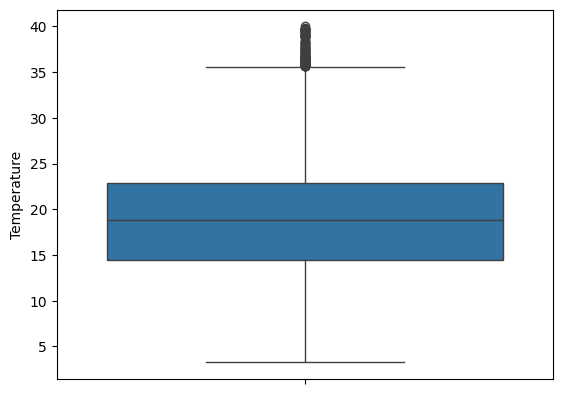

In [ ]:
sns.boxplot(df['Temperature'])


In [ ]:
df['Temperature'].corr(df.TotalPowerConsumption)

0.44022078902914086

In [ ]:
a1=np.where(df['Temperature']>36)[0]
len(a1)


103

<Axes: ylabel='Humidity'>

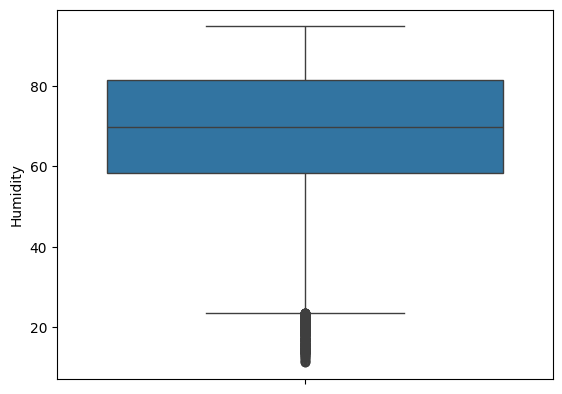

In [ ]:
sns.boxplot(df['Humidity'])


In [ ]:
a2=np.where(df['Humidity']<20)[0]


In [ ]:
df['Humidity'].corr(df.TotalPowerConsumption)

-0.2874206017579745

In [ ]:
len(a2)

148

<Axes: ylabel='WindSpeed'>

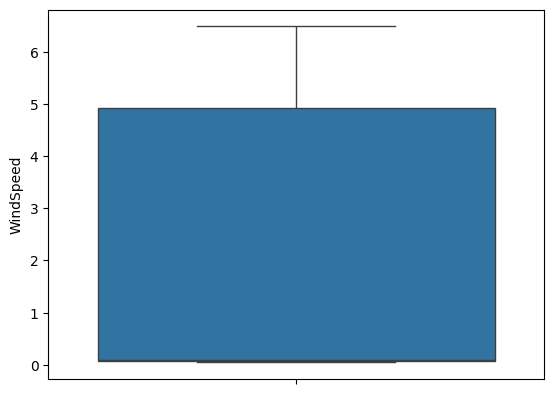

In [ ]:
sns.boxplot(df['WindSpeed'])


In [ ]:
df['WindSpeed'].corr(df.TotalPowerConsumption)

0.16744407628230545

<Axes: ylabel='GeneralDiffuseFlows'>

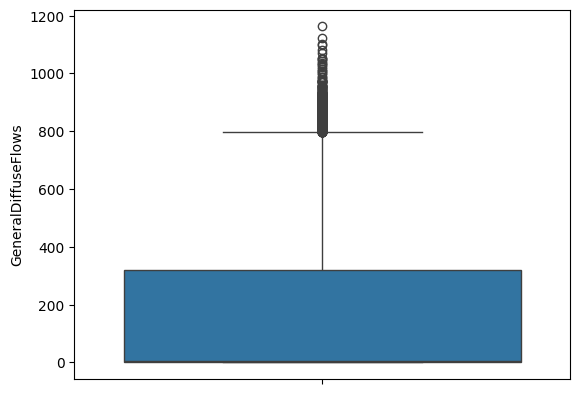

In [ ]:
sns.boxplot(df['GeneralDiffuseFlows'])

In [ ]:
df['GeneralDiffuseFlows'].corr(df.TotalPowerConsumption)

0.18796459685877176

In [ ]:
a3=np.where(df['GeneralDiffuseFlows']>800)[0]
len(a3)

2266

<Axes: ylabel='TotalPowerConsumption'>

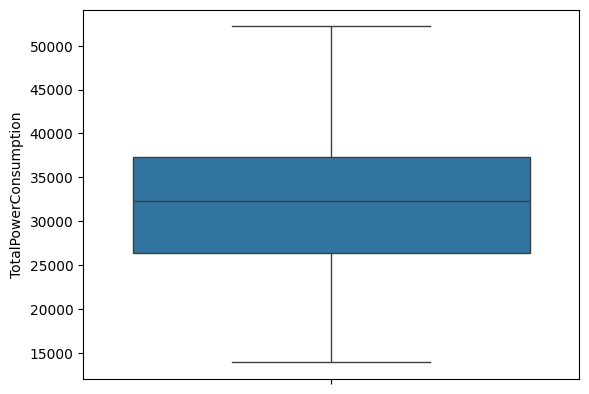

In [ ]:
sns.boxplot(df['TotalPowerConsumption'])

In [ ]:
df['DiffuseFlows'].corr(df.TotalPowerConsumption)

0.08027390456281466

In [ ]:
a4=np.where(df['DiffuseFlows']>201)[0]
len(a4)

6600

<Axes: ylabel='DiffuseFlows'>

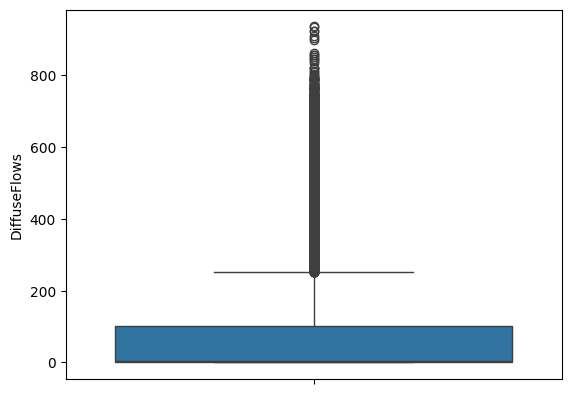

In [ ]:
sns.boxplot(df['DiffuseFlows'])

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.head()

,Temperature,Humidity,WindSpeed,DiffuseFlows,GeneralDiffuseFlows,hour,minute,dayofweek,quarter,month,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_working_day,is_business_hours,is_peak_hour,minute_of_day,minute_of_week,TotalPowerConsumption
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.119,0.051,0.0,0.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8640.0,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.085,0.070,0.0,10.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8650.0,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.100,0.062,0.0,20.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,8660.0,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.096,0.091,0.0,30.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,8670.0,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.085,0.048,0.0,40.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,8680.0,27335.69620


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [ ]:
X_train.shape

(49795, 26)

In [ ]:
y_train.shape


(49795,)

In [ ]:
X_test.shape

(2621, 26)

In [ ]:
y_test.shape

(2621,)

 **XgBoost Regression**

In [ ]:
import xgboost as xg


In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
pred = xgb_r.predict(X_test)


In [ ]:
rmse = np.sqrt(MSE(y_test, pred))


In [ ]:
rmse

1493.879492604597

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
predictions = [round(value) for value in pred]


In [ ]:
mse = mean_squared_error(pred, y_test)


In [ ]:
mse

2231675.938424568

In [ ]:
predictions = [round(value) for value in pred]
# evaluate predictions
accuracy = r2_score(y_test, predictions)


In [ ]:
accuracy

0.9578975348769699

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.05, random_state=0)


In [ ]:
model = LinearRegression()


In [ ]:
x_train.shape

(49795, 26)

In [ ]:
Y_train.shape

(49795,)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)


SimpleImputer()

In [ ]:
X_train_imputed = imputer.transform(x_train)
X_test_imputed = imputer.transform(x_test)




In [ ]:
model.fit(X_train_imputed, Y_train)


LinearRegression()

In [ ]:
predictions = model.predict(X_test_imputed)


In [ ]:
mse = mean_squared_error(Y_test, predictions)


In [ ]:
print("Mean Squared Error:", mse)


Mean Squared Error: 17930676.256256912


In [ ]:
accuracy = r2_score(y_test, pred)


In [ ]:
accuracy

0.9578977844033668

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)


In [ ]:
knn_regressor.fit(X_train_imputed, Y_train)


KNeighborsRegressor()

In [ ]:
predictions = knn_regressor.predict(X_test_imputed)


In [ ]:
accuracy = r2_score(Y_test, predictions)


In [ ]:
accuracy

0.9552380403391496

In [ ]:
mse = mean_squared_error(predictions, Y_test)


In [ ]:
mse

2372658.7049219147

#SVM

In [ ]:
from sklearn.svm import SVR


In [ ]:
svm_regressor = SVR(kernel='rbf')


In [ ]:
svm_regressor.fit(X_train_imputed, Y_train)


SVR()

In [ ]:
predictions = svm_regressor.predict(X_test_imputed)


In [ ]:
accuracy = r2_score(Y_test, predictions)


In [ ]:
accuracy

0.04466293534574939

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
tree_regressor = DecisionTreeRegressor()


In [ ]:
tree_regressor.fit(X_train_imputed, Y_train)


DecisionTreeRegressor()

In [ ]:
predictions = tree_regressor.predict(X_test_imputed)


In [ ]:
accuracy = r2_score(Y_test, predictions)

In [ ]:
accuracy

0.9858180725868351

In [ ]:
mse = mean_squared_error(Y_test, predictions)


In [ ]:
mse

751729.2313465549

In [ ]:
from sklearn.metrics import accuracy_score